# Librairie

In [1]:
library(readr)
library(dplyr)
library(tableone)
library(readxl)
library(openxlsx)
library(forcats)
library(stringr)
library(purrr)
library(tidyverse)
library(glue)
library(flextable)
library(logistf)


Attachement du package : 'dplyr'


Les objets suivants sont masqués depuis 'package:stats':

    filter, lag


Les objets suivants sont masqués depuis 'package:base':

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attachement du package : 'flextable'


L'objet suivant est masqué depuis 'package:purrr':

    compose


Registered S3 method overwritten by 'formula.tools':
  method               from    
  as.character.formula openxlsx



# Import Data

In [2]:
list.files("../data")

[1] "~$Optimum HLPV 11052025 anonymisé.xlsx"
[2] "Optimum HLPV 11052025 anonymisé.xlsx"

In [3]:
df <- read_excel("../data/Optimum HLPV 11052025 anonymisé.xlsx")

# On enlève la ligne description
df_raw <- df[-1, ]

In [4]:
df_raw

NUMERO_PATIENT,AGE,SEXE,DMS,ADL,DOMICILE,EHPAD,IMC,OBESITE,DENUTRITION,⋯,TYPE_SUIVI_SATELIA,ALERTE_ORANGE_PREALABLE_A_1e_REHOSPITALISATION_POUR_IC,ALERTE_ROUGE_PREALABLE_A_1e_REHOSPITALISATION_POUR_IC,OUTCOME_REHOSPITALISATION_12MOIS,REHOSPITALISATION_IC_1MOIS,REHOSPITALISATION_IC_3MOIS,REHOSPITALISATION_IC_6MOIS,REHOSPITALISATION_IC_12MOIS,REHOSPITALISATION_IC_>12MOIS,NBRE_REHOSPITALISATION_IC_12MOIS
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,94,1,6,5.5,1,0,25.5,0,2,⋯,0,NA,NA,0,0,0,0,0,1,0
2,77,1,7,6,1,0,22.4,0,2,⋯,0,NA,NA,0,0,0,0,0,0,0
3,77,0,8,5.5,1,0,32.299999999999997,1,2,⋯,1,NA,NA,1,0,0,0,1,0,3
4,90,0,8,5,1,0,28.6,0,2,⋯,1,NA,NA,0,0,0,0,0,0,0
5,91,0,7,5.5,1,0,21,0,2,⋯,0,NA,NA,1,0,1,1,1,0,2
6,75,1,8,6,1,0,31,1,0,⋯,0,NA,NA,0,0,0,0,0,0,0
7,92,0,4,5,1,0,25,0,1,⋯,0,NA,NA,1,0,0,1,1,0,1
8,91,0,10,5.5,1,0,30,1,0,⋯,0,NA,NA,1,0,0,0,0,0,0
9,84,1,8,6,1,0,21.4,0,1,⋯,0,NA,NA,1,1,1,1,1,0,1


In [5]:
names(df_raw)

[1] "NUMERO_PATIENT"                                        
 [2] "AGE"                                                   
 [3] "SEXE"                                                  
 [4] "DMS"                                                   
 [5] "ADL"                                                   
 [6] "DOMICILE"                                              
 [7] "EHPAD"                                                 
 [8] "IMC"                                                   
 [9] "OBESITE"                                               
[10] "DENUTRITION"                                           
[11] "SCORE_CHARLSON"                                        
[12] "SYNDROME_DEPRESSIF"                                    
[13] "TROUBLES_COGNITIFS_SEVERES"                            
[14] "ATCD_CANCER"                                           
[15] "CANCER_ACTIF"                                          
[16] "ATCD_BPCO"                                             
[17] "ATCD_HTA"                                              
[18] "ATCD_DYSLIPIDEMIE"                                     
[19] "ATCD_DIABETE"                                          
[20] "ATCD_AVC"                                              
[21] "ATCD_AOMI"                                             
[22] "ATCD_CARDIOPATHIE_ISCHEMIQUE"                          
[23] "ATCD_FA_FLUTTER"                                       
[24] "ATCD_AMYLOSE"                                          
[25] "PM_DAI"                                                
[26] "FEVG_CLASSE"                                           
[27] "RAC_AU_MOINS_MODEREE"                                  
[28] "IM_AU_MOINS_MODEREE"                                   
[29] "IT_AU_MOINS_MODEREE"                                   
[30] "ALBUMINE"                                              
[31] "HbA1c"                                                 
[32] "STADE_IRC_DFG_SORTIE"                                  
[33] "NT_PRO_BNP_SORTIE"                                     
[34] "FERRITINE"                                             
[35] "CST"                                                   
[36] "CARENCE_MARTIALE_VRAIE"                                
[37] "CARENCE_MARTIALE_FONCTIONNELLE"                        
[38] "ANEMIE_HB<10g/l"                                       
[39] "CARENCE_VITAMINE_B9"                                   
[40] "CARENCE_VITAMINE_B12"                                  
[41] "CARENCE_VITAMINE_D"                                    
[42] "PRESENCE_IECi/ARA2"                                    
[43] "PRESENCE_ACEi"                                         
[44] "PRESENCE_BB-"                                          
[45] "PRESENCE_MRA"                                          
[46] "PRESENCE_SORTIE_ISGLT2"                                
[47] ">/=3_FANTASTIQUES_FEVG<50%"                            
[48] "PRESENCE_ISGLT2_FEVG>50%"                              
[49] "PRESENCE_SORTIE_DIURETIC"                              
[50] "DOSAGE_SORTIE_DIURETIC"                                
[51] "TYPE_DIURETIC"                                         
[52] "PRESENCE_SORTIE_ANTICOAGULANT"                         
[53] "PRESENCE_SORTIE_AAP"                                   
[54] "TYPE_SUIVI_SATELIA"                                    
[55] "ALERTE_ORANGE_PREALABLE_A_1e_REHOSPITALISATION_POUR_IC"
[56] "ALERTE_ROUGE_PREALABLE_A_1e_REHOSPITALISATION_POUR_IC" 
[57] "OUTCOME_REHOSPITALISATION_12MOIS"                      
[58] "REHOSPITALISATION_IC_1MOIS"                            
[59] "REHOSPITALISATION_IC_3MOIS"                            
[60] "REHOSPITALISATION_IC_6MOIS"                            
[61] "REHOSPITALISATION_IC_12MOIS"                           
[62] "REHOSPITALISATION_IC_>12MOIS"                          
[63] "NBRE_REHOSPITALISATION_IC_12MOIS"

# Data Preprocessing

In [6]:
# Aperçu des classes de colonnes
sapply(df_raw, class) %>% table()

.
character   logical   numeric 
       59         2         2 

In [7]:
# Suppression colonne sans données
df_raw <- df_raw %>% select(-ALERTE_ORANGE_PREALABLE_A_1e_REHOSPITALISATION_POUR_IC, 
                            -ALERTE_ROUGE_PREALABLE_A_1e_REHOSPITALISATION_POUR_IC, 
                            -EHPAD, 
                            -DOMICILE)

In [8]:
df_raw <- df_raw %>%
    rename(
        PRESENCE_ISGLT2_FEVG_sup50 = `PRESENCE_ISGLT2_FEVG>50%`,
        FANTASTIQUES_3_FEVG_inf50   = `>/=3_FANTASTIQUES_FEVG<50%`,
        ANEMIE_HB_10_gl = `ANEMIE_HB<10g/l`,
        PRESENCE_BB = `PRESENCE_BB-`,
        PRESENCE_IECi_ARA2= `PRESENCE_IECi/ARA2`
      
  )

In [9]:
# On Définit les types de nos colonnes
char_cols      <- c(
    "NUMERO_PATIENT"
)

integer_cols   <- c(
    "AGE",
    "DMS",
    "SCORE_CHARLSON", 
    "NT_PRO_BNP_SORTIE",
    "FERRITINE",
    "DOSAGE_SORTIE_DIURETIC"
)

double_cols    <- c(
    "ADL",
    "IMC",
    "ALBUMINE"
)

percent_cols   <- c(
    "HbA1c", 
    "CST"
) 

bool_cols      <- c(
    "SEXE",
    "OBESITE",
    "SYNDROME_DEPRESSIF",
    "TROUBLES_COGNITIFS_SEVERES",
    "ATCD_CANCER",
    "CANCER_ACTIF",
    "ATCD_BPCO",
    "ATCD_HTA",
    "ATCD_DYSLIPIDEMIE",
    "ATCD_DIABETE",
    "ATCD_AVC",
    "ATCD_AOMI",
    "ATCD_FA_FLUTTER",
    "ATCD_AMYLOSE",
    "PM_DAI",
    "RAC_AU_MOINS_MODEREE",
    "IM_AU_MOINS_MODEREE",
    "IT_AU_MOINS_MODEREE",
    "CARENCE_MARTIALE_VRAIE",
    "CARENCE_MARTIALE_FONCTIONNELLE",
    "ANEMIE_HB_10_gl",
    "CARENCE_VITAMINE_B9",
    "CARENCE_VITAMINE_B12",
    "CARENCE_VITAMINE_D",
    "PRESENCE_IECi_ARA2",
    "PRESENCE_ACEi",
    "PRESENCE_BB",
    "PRESENCE_MRA",
    "PRESENCE_SORTIE_ISGLT2",
    "PRESENCE_SORTIE_DIURETIC",
    "PRESENCE_SORTIE_ANTICOAGULANT",
    "PRESENCE_SORTIE_AAP",
    "PRESENCE_ISGLT2_FEVG_sup50",
    "FANTASTIQUES_3_FEVG_inf50"
)


ordinal_mappings <- list(
    DENUTRITION = c(
        "0" = "Risque dénutrition",
        "1" = "Dénutrition modérée",
        "2" = "Dénutrition sévère",
        "3" = "Inconnu"
    ),
    ATCD_CARDIOPATHIE_ISCHEMIQUE = c(
        "0" = "NON", 
        "1" = "Traitement médical",
        "2" = "Angioplastie stent",
        "3" = "Pontage"
    ),
    FEVG_CLASSE = c(
        "0" = "Altérée (</=40%)",
        "1" = "Moyennement altérée (41-49%)",
        "2" = "Préservée (>/=50%)"
    ),
    STADE_IRC_DFG_SORTIE = c(
        "1" = "DFG>90 ml/min",
        "2" = "DFG=60-89 ml/min",
        "3A" = "45-59 ml/min",
        "3B" = "30-44 ml/min",
        "4" = "15-29 ml/min",
        "5" = "<14 ml/min"

    ),
    TYPE_DIURETIC = c(
        "0" = "FUROSEMIDE",
        "1" = "BUMETAMIDE"
    ),
    TYPE_SUIVI_SATELIA = c(
        "0" = "Patient", 
        "1" = "Satelia" 
    )
)

rehosp_cols    <- c(
  "REHOSPITALISATION_IC_1MOIS",
  "REHOSPITALISATION_IC_3MOIS",
  "REHOSPITALISATION_IC_6MOIS",
  "REHOSPITALISATION_IC_12MOIS",
  "REHOSPITALISATION_IC_>12MOIS"
)

In [10]:
# Vérification des booléens
bool_vals <- lapply(df_raw[bool_cols], function(x) unique(x))

bool_vals

$SEXE
[1] "1" "0"

$OBESITE
[1] "0" "1"

$SYNDROME_DEPRESSIF
[1] "0" "1"

$TROUBLES_COGNITIFS_SEVERES
[1] "0" "1"

$ATCD_CANCER
[1] "1" "0"

$CANCER_ACTIF
[1] "0" "1"

$ATCD_BPCO
[1] "0" "1"

$ATCD_HTA
[1] "1" "0"

$ATCD_DYSLIPIDEMIE
[1] "1" "0"

$ATCD_DIABETE
[1] "0" "1"

$ATCD_AVC
[1] "0" "1"

$ATCD_AOMI
[1] "0" "1"

$ATCD_FA_FLUTTER
[1] "0" "1"

$ATCD_AMYLOSE
[1] "0" "1"

$PM_DAI
[1] "1" "0"

$RAC_AU_MOINS_MODEREE
[1] "0"  "1"  "NC"

$IM_AU_MOINS_MODEREE
[1] "0"  "1"  "NC"

$IT_AU_MOINS_MODEREE
[1] "0"  "1"  "NC"

$CARENCE_MARTIALE_VRAIE
[1] "0"  "1"  "NC"

$CARENCE_MARTIALE_FONCTIONNELLE
[1] "0"  "1"  "NC"

$ANEMIE_HB_10_gl
[1] "0" "1"

$CARENCE_VITAMINE_B9
[1] "1"  "0"  "NC"

$CARENCE_VITAMINE_B12
[1] "0"  "NC" "1" 

$CARENCE_VITAMINE_D
[1] "1"  "0"  "NC"

$PRESENCE_IECi_ARA2
[1] "0" "1"

$PRESENCE_ACEi
[1] "1" "0"

$PRESENCE_BB
[1] "1" "0"

$PRESENCE_MRA
[1] "1" "0"

$PRESENCE_SORTIE_ISGLT2
[1] "1" "0"

$PRESENCE_SORTIE_DIURETIC
[1] "1" "0"

$PRESENCE_SORTIE_ANTICOAGULANT
[1] "0" "1"

$PRESENCE_SORTIE_AAP
[1] "1" "0"

$PRESENCE_ISGLT2_FEVG_sup50
[1] "0" "1"

$FANTASTIQUES_3_FEVG_inf50
[1] "1" "0"

In [55]:
# Pipeline de typage
df_clean <- df_raw %>%
    # Caractères
    mutate(across(all_of(char_cols), as.character)) %>%
    # Doubles
    mutate(across(all_of(double_cols),
                ~ as.numeric( na_if(trimws(.x), "NC") ))) %>%
    # Entiers
    mutate(across(all_of(integer_cols),
                ~ as.integer(parse_number(trimws(.x), na = c("", "NC", "NA"))))) %>%
    # Pourcentages
    mutate(across(all_of(percent_cols),
                ~ as.numeric(na_if(trimws(.x), "NC") ))) %>%

    # Booléens → logique → factor Non/Oui
    mutate(across(all_of(bool_cols),
                ~ case_when(.x %in% c("1",1,TRUE) ~ TRUE,
                            .x %in% c("0",0,FALSE)~ FALSE, TRUE~NA))) %>%
    mutate(across(all_of(bool_cols),
                ~ factor(.x, levels=c(FALSE,TRUE), labels=c("Non","Oui")))) %>%
    # — Réhospitalisations → factor Non/Oui + NA en place
    mutate(across(all_of(rehosp_cols),
                ~ factor(
                    case_when(
                      .x == "1"              ~ "Oui",
                      .x == "0"              ~ "Non",
                      .x %in% c("NC","NA","") ~ NA_character_
                    ),
                    levels = c("Non","Oui")
                  )
         )) %>%
    # Ordinales via mapping
    { 
    df <- .
    for(col in names(ordinal_mappings)) {
      map <- ordinal_mappings[[col]]
      df <- df %>% mutate(
        !!col := {
          x   <- as.character(.data[[col]])
          lab <- map[x]                 # nommage par clé
          # lab est NA si x n’était pas un code valide (inclut NC/NA)
          factor(
            lab, 
            levels  = unname(map), 
            ordered = TRUE
          )
        }
      )
    }
    df
    }

ERROR: [1m[33mError[39m in `mutate()`:[22m
[1m[22m[36mℹ[39m In argument: `across(all_of(char_cols), as.character)`.
[1mCaused by error in `across()`:[22m
[1m[22m[36mℹ[39m In argument: `all_of(char_cols)`.
[1mCaused by error in `all_of()`:[22m
[33m![39m Can't subset elements that don't exist.
[31m✖[39m Element `NUMERO_PATIENT` doesn't exist.


In [12]:
# Sanity checks
glimpse(df_clean)

Rows: 135
Columns: 59
$ NUMERO_PATIENT                   <chr> "1", "2", "3", "4", "5", "6", "7", "8…
$ AGE                              <int> 94, 77, 77, 90, 91, 75, 92, 91, 84, 8…
$ SEXE                             <fct> Oui, Oui, Non, Non, Non, Oui, Non, No…
$ DMS                              <int> 6, 7, 8, 8, 7, 8, 4, 10, 8, 7, 17, 6,…
$ ADL                              <dbl> 5.5, 6.0, 5.5, 5.0, 5.5, 6.0, 5.0, 5.…
$ IMC                              <dbl> 25.5, 22.4, 32.3, 28.6, 21.0, 31.0, 2…
$ OBESITE                          <fct> Non, Non, Oui, Non, Non, Oui, Non, Ou…
$ DENUTRITION                      <ord> Dénutrition sévère, Dénutrition sévèr…
$ SCORE_CHARLSON                   <int> 9, 7, 7, 6, 6, 5, 11, 9, 7, 8, 4, 11,…
$ SYNDROME_DEPRESSIF               <fct> Non, Non, Non, Non, Non, Oui, Non, Ou…
$ TROUBLES_COGNITIFS_SEVERES       <fct> Non, Non, Non, Non, Non, Non, Non, No…
$ ATCD_CANCER                      <fct> Oui, Oui, Non, Non, Oui, Non, Non, No…
$ CANCER_ACTIF    

In [13]:
tibble(
  Class = sapply(df_clean, function(x) class(x)[1])
) %>%
  count(Class, name = "Count")

Class,Count
<chr>,<int>
character,3
factor,39
integer,6
numeric,5
ordered,6


In [14]:
# Vérification
# Colonnes « factor » non ordonnées
factor_cols <- names(df_clean)[
  sapply(df_clean, is.factor) & !sapply(df_clean, is.ordered)
]

# Colonnes « ordered factor »
ordered_cols <- names(df_clean)[
  sapply(df_clean, is.ordered)
]

# Colonnes de type integer
integer_cols_detected <- names(df_clean)[
  sapply(df_clean, is.integer)
]

# Colonnes de type numeric (double) excluant les integer
numeric_cols_detected <- names(df_clean)[
  sapply(df_clean, is.numeric) & !sapply(df_clean, is.integer)
]

# Affichage
list(
    Factors        = factor_cols,
    OrderedFactors = ordered_cols,
    Double = numeric_cols_detected,
    Integer = integer_cols_detected
)


$Factors
 [1] "SEXE"                           "OBESITE"                       
 [3] "SYNDROME_DEPRESSIF"             "TROUBLES_COGNITIFS_SEVERES"    
 [5] "ATCD_CANCER"                    "CANCER_ACTIF"                  
 [7] "ATCD_BPCO"                      "ATCD_HTA"                      
 [9] "ATCD_DYSLIPIDEMIE"              "ATCD_DIABETE"                  
[11] "ATCD_AVC"                       "ATCD_AOMI"                     
[13] "ATCD_FA_FLUTTER"                "ATCD_AMYLOSE"                  
[15] "PM_DAI"                         "RAC_AU_MOINS_MODEREE"          
[17] "IM_AU_MOINS_MODEREE"            "IT_AU_MOINS_MODEREE"           
[19] "CARENCE_MARTIALE_VRAIE"         "CARENCE_MARTIALE_FONCTIONNELLE"
[21] "ANEMIE_HB_10_gl"                "CARENCE_VITAMINE_B9"           
[23] "CARENCE_VITAMINE_B12"           "CARENCE_VITAMINE_D"            
[25] "PRESENCE_IECi_ARA2"             "PRESENCE_ACEi"                 
[27] "PRESENCE_BB"                    "PRESENCE_MRA"                  
[29] "PRESENCE_SORTIE_ISGLT2"         "FANTASTIQUES_3_FEVG_inf50"     
[31] "PRESENCE_ISGLT2_FEVG_sup50"     "PRESENCE_SORTIE_DIURETIC"      
[33] "PRESENCE_SORTIE_ANTICOAGULANT"  "PRESENCE_SORTIE_AAP"           
[35] "REHOSPITALISATION_IC_1MOIS"     "REHOSPITALISATION_IC_3MOIS"    
[37] "REHOSPITALISATION_IC_6MOIS"     "REHOSPITALISATION_IC_12MOIS"   
[39] "REHOSPITALISATION_IC_>12MOIS"  

$OrderedFactors
[1] "DENUTRITION"                  "ATCD_CARDIOPATHIE_ISCHEMIQUE"
[3] "FEVG_CLASSE"                  "STADE_IRC_DFG_SORTIE"        
[5] "TYPE_DIURETIC"                "TYPE_SUIVI_SATELIA"          

$Double
[1] "ADL"      "IMC"      "ALBUMINE" "HbA1c"    "CST"     

$Integer
[1] "AGE"                    "DMS"                    "SCORE_CHARLSON"        
[4] "NT_PRO_BNP_SORTIE"      "FERRITINE"              "DOSAGE_SORTIE_DIURETIC"

In [15]:
na_props <- function(cols) {
  props <- sapply(df_clean[cols], function(x) mean(is.na(x)))  
  props[props > 0]  
}

# 3. Appliquer à vos différents groupes de colonnes
integer_na  <- na_props(integer_cols)
double_na   <- na_props(double_cols)
percent_na  <- na_props(percent_cols)
bool_na     <- na_props(bool_cols)
rehosp_na   <- na_props(rehosp_cols)
ordinal_na  <- na_props(names(ordinal_mappings))

# 4. Afficher les résultats
print(list(
  integer   = integer_na,
  double    = double_na,
  percent   = percent_na,
  boolean   = bool_na,
  rehospitalisation = rehosp_na,
  ordinal   = ordinal_na
))

$integer
     NT_PRO_BNP_SORTIE              FERRITINE DOSAGE_SORTIE_DIURETIC 
            0.02222222             0.06666667             0.05925926 

$double
named numeric(0)

$percent
     HbA1c        CST 
0.20000000 0.08148148 

$boolean
          RAC_AU_MOINS_MODEREE            IM_AU_MOINS_MODEREE 
                   0.007407407                    0.007407407 
           IT_AU_MOINS_MODEREE         CARENCE_MARTIALE_VRAIE 
                   0.007407407                    0.066666667 
CARENCE_MARTIALE_FONCTIONNELLE            CARENCE_VITAMINE_B9 
                   0.066666667                    0.037037037 
          CARENCE_VITAMINE_B12             CARENCE_VITAMINE_D 
                   0.037037037                    0.007407407 

$rehospitalisation
REHOSPITALISATION_IC_6MOIS 
               0.007407407 

$ordinal
  FEVG_CLASSE TYPE_DIURETIC 
   0.01481481    0.05925926 



In [16]:
# Vérification pour modalité 1 mois
table(df_clean$REHOSPITALISATION_IC_1MOIS, useNA = "ifany")


Non Oui 
130   5 

In [17]:
# Vérification pour modalité 3 mois
table(df_clean$REHOSPITALISATION_IC_3MOIS, useNA = "ifany")


Non Oui 
124  11 

In [18]:
# Vérification pour modalité 6 mois
table(df_clean$REHOSPITALISATION_IC_6MOIS, useNA = "ifany")


 Non  Oui <NA> 
 115   19    1 

In [19]:
# Vérification pour modalité 12 mois
table(df_clean$REHOSPITALISATION_IC_12MOIS, useNA = "ifany")


Non Oui 
106  29 

# Définition des Variables

In [20]:
# Spéciales Vairiables
special_vars <- c("PRESENCE_ISGLT2_FEVG_sup50", "FANTASTIQUES_3_FEVG_inf50")

# Retire les special_vars de bool_cols
bool_cols <- setdiff(bool_cols, special_vars)

# Variables continues
cont_vars <- c(double_cols, integer_cols, percent_cols)

# Variables catégorielles
cat_vars  <- c(bool_cols, names(ordinal_mappings), special_vars)

# Vairiable cible et on enlève "REHOSPITALISATION_IC_>12MOIS" sinon [1:5]
horizons   <- rehosp_cols[1:4]  

# Toutes vos variables à décrire (continues + catégorielles)
all_vars <- c(cont_vars, cat_vars)

# Exclure les spéciales pour le tableau global
global_vars <- setdiff(all_vars, special_vars)


In [21]:
# Variables explicatives
vars_multivariees <- c("AGE", "SEXE", "ATCD_HTA", "SCORE_CHARLSON", 
                       "IM_AU_MOINS_MODEREE", "CARENCE_MARTIALE_VRAIE")


# All_Patient Univarié

In [51]:
# 0) listes
cont_only    <- cont_vars
cat_only     <- intersect(cat_vars, union(global_vars, special_vars))
all_base_vars <- c(cont_vars,
                   intersect(global_vars, cat_vars),
                   intersect(special_vars, cat_vars))

N_tot       <- nrow(df_clean)
df_tab_list <- list()

for (h in horizons) {

  # 1) CI 95% t‐test sur les continues
  ci_cont_h <- map_dfr(cont_only, function(var) {
    tt <- t.test(df_clean[[var]] ~ df_clean[[h]])
    tibble(
      Variable = var,
      CI_95    = sprintf("%.2f–%.2f",
                         pmax(tt$conf.int[1], 0),
                         tt$conf.int[2]),
      p_val    = formatC(tt$p.value, digits = 3, format = "f")
    )
  })

  # 2) CI 95% binom.test sur toutes les catégorielles
  ci_cat_h <- df_clean %>%
    mutate(across(all_of(cat_only), as.character)) %>%
    select(all_of(cat_only)) %>%
    pivot_longer(everything(), names_to = "Variable", values_to = "Response") %>%
    filter(!is.na(Response)) %>%
    group_by(Variable) %>%
    summarise(x = sum(Response == "Oui", na.rm = TRUE),
              n = n(), .groups = "drop") %>%
    rowwise() %>%
    mutate(
      testres = list(binom.test(x, n, conf.level = 0.95)),
      CI_95   = sprintf("%.1f%%–%.1f%%",
                        100 * testres$conf.int[1],
                        100 * testres$conf.int[2]),
      p_val   = formatC(testres$p.value, digits = 3, format = "f")
    ) %>%
    ungroup() %>%
    select(Variable, CI_95, p_val)

  # 3) fusion des deux
  ci_all <- bind_rows(ci_cont_h, ci_cat_h)

  # 4) création du TableOne global
  tab <- CreateTableOne(
    vars       = global_vars,
    strata     = h,
    data       = df_clean,
    factorVars = intersect(global_vars, cat_vars),
    includeNA  = TRUE,
    addOverall = TRUE,
    test       = TRUE,
    smd        = FALSE
  )
  mat <- print(tab,
               showAllLevels    = TRUE,
               quote            = FALSE,
               noSpaces         = FALSE,
               printToggle      = FALSE,
               smd              = FALSE,
               test             = TRUE,
               missing          = TRUE,
               catDigits        = 2,
               contDigits       = 2,
               pDigits          = 3,
               includeStrataCol = TRUE,
               exact            = TRUE,
               formatOptions    = list(continuous = "meanSD")
  )

  # 5) nettoyage et injection CI/p dans global
  df_raw <- as.data.frame(mat, stringsAsFactors = FALSE, check.names = FALSE) %>%
    rownames_to_column("Variable") %>%
    mutate(
      Missing_pct = as.numeric(str_remove(Missing, "%")),
      Missing_abs = ceiling(Missing_pct / 100 * N_tot),
      Missing     = if_else(is.na(Variable), "", str_c(Missing_abs, " (", Missing, ")")),
      VarBase     = map_chr(Variable, ~ {
        f <- all_base_vars[str_detect(.x, fixed(all_base_vars))]
        if      (length(f) > 1) f[which.max(nchar(f))]
        else if (length(f) == 1) f
        else                     NA_character_
      })
    ) %>%
    select(-Missing_pct, -Missing_abs, -test, -p)  

  df_cont <- df_raw %>%
    filter(VarBase %in% cont_only) %>%
    left_join(ci_cont_h, by = c("VarBase" = "Variable"))

  df_cat  <- df_raw %>%
    filter(VarBase %in% cat_only) %>%
    left_join(ci_cat_h,  by = c("VarBase" = "Variable"))

  df_global <- bind_rows(df_cont, df_cat) %>%
    select(Variable, Missing, everything(), -VarBase) %>%
    rename(p = p_val)

  # 6) mêmes opérations pour les tableaux “spéciaux”
  dfs_special <- map(special_vars, function(var_sp) {

    # 6a) TableOne
    tab_sp <- CreateTableOne(
      vars       = var_sp,
      strata     = h,
      data       = df_clean,
      factorVars = var_sp,
      includeNA  = TRUE,
      addOverall = TRUE,
      test       = TRUE
    )
    mat_sp <- print(tab_sp,
                    showAllLevels    = TRUE,
                    quote            = FALSE,
                    noSpaces         = FALSE,
                    printToggle      = FALSE,
                    test             = TRUE,
                    missing          = TRUE,
                    catDigits        = 2,
                    includeStrataCol = TRUE,
                    exact            = TRUE
    )

    # 6b) nettoyage + injection (catégoriel uniquement)
    as.data.frame(mat_sp, stringsAsFactors = FALSE, check.names = FALSE) %>%
      rownames_to_column("Variable") %>%
      mutate(
        Missing_pct = as.numeric(str_remove(Missing, "%")),
        Missing_abs = ceiling(Missing_pct / 100 * N_tot),
        Missing     = if_else(is.na(Variable), "", str_c(Missing_abs, " (", Missing, ")")),
        VarBase     = var_sp
      ) %>%
      select(-Missing_pct, -Missing_abs, -test, -p) %>%
      left_join(ci_cat_h, by = c("VarBase" = "Variable")) %>%
      select(Variable, Missing, everything(), -VarBase) %>%
      rename(p = p_val)
  })
  names(dfs_special) <- special_vars

  # 7) stockage
  df_tab_list[[h]] <- c(list(global = df_global), dfs_special)
}

In [52]:
df_tab_list[["REHOSPITALISATION_IC_12MOIS"]][["PRESENCE_ISGLT2_FEVG_sup50"]]

Variable,Missing,level,Overall,Non,Oui,CI_95,p
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,NA,,135,106,29,47.5%–64.8%,0.168
PRESENCE_ISGLT2_FEVG_sup50 (%),0 (0.0),Non,59 (43.70),50 (47.17),9 (31.03),47.5%–64.8%,0.168
,NA,Oui,76 (56.30),56 (52.83),20 (68.97),47.5%–64.8%,0.168


In [53]:
df_tab_list[["REHOSPITALISATION_IC_12MOIS"]][["FANTASTIQUES_3_FEVG_inf50"]]

Variable,Missing,level,Overall,Non,Oui,CI_95,p
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
n,NA,,135,106,29,17.5%–32.6%,0.000
FANTASTIQUES_3_FEVG_inf50 (%),0 (0.0),Non,102 (75.56),77 (72.64),25 (86.21),17.5%–32.6%,0.000
,NA,Oui,33 (24.44),29 (27.36),4 (13.79),17.5%–32.6%,0.000


In [54]:
df_tab_list[["REHOSPITALISATION_IC_12MOIS"]]$global

Variable,Missing,level,Overall,Non,Oui,CI_95,p
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ADL..mean..SD..,0 ( 0.0),,5.27 (0.98),5.33 (0.90),5.05 (1.22),0.00–0.77,0.259
IMC..mean..SD..,0 ( 0.0),,26.90 (5.42),26.75 (5.59),27.45 (4.77),0.00–1.38,0.501
ALBUMINE..mean..SD..,0 ( 0.0),,31.40 (5.24),30.96 (5.53),33.01 (3.64),0.00–-0.32,0.021
AGE..mean..SD..,0 ( 0.0),,85.84 (6.82),85.69 (6.96),86.41 (6.40),0.00–2.02,0.598
DMS..mean..SD..,0 ( 0.0),,7.52 (3.19),7.62 (3.29),7.14 (2.81),0.00–1.71,0.432
SCORE_CHARLSON..mean..SD..,0 ( 0.0),,7.97 (2.30),7.76 (2.32),8.72 (2.07),0.00–-0.06,0.036
NT_PRO_BNP_SORTIE..mean..SD..,3 ( 2.2),,3200.90 (4726.57),3177.27 (5071.77),3284.83 (3287.50),0.00–1466.11,0.892
FERRITINE..mean..SD..,10 ( 6.7),,350.06 (385.96),384.66 (382.78),234.34 (380.35),0.00–312.56,0.069
DOSAGE_SORTIE_DIURETIC..mean..SD..,8 ( 5.9),,113.66 (163.10),97.68 (139.19),170.18 (222.65),0.00–17.69,0.111


In [28]:
cont_vars

[1] "ADL"                    "IMC"                    "ALBUMINE"              
 [4] "AGE"                    "DMS"                    "SCORE_CHARLSON"        
 [7] "NT_PRO_BNP_SORTIE"      "FERRITINE"              "DOSAGE_SORTIE_DIURETIC"
[10] "HbA1c"                  "CST"

In [29]:
ci_cont_h

Variable,CI_95,p_val
<chr>,<chr>,<chr>
ADL,0.00–0.77,0.259
IMC,0.00–1.38,0.501
ALBUMINE,0.00–-0.32,0.021
AGE,0.00–2.02,0.598
DMS,0.00–1.71,0.432
SCORE_CHARLSON,0.00–-0.06,0.036
NT_PRO_BNP_SORTIE,0.00–1466.11,0.892
FERRITINE,0.00–312.56,0.069
DOSAGE_SORTIE_DIURETIC,0.00–17.69,0.111


# Enregistrer

In [30]:
# Styles
wb         <- createWorkbook()
hdrStyle   <- createStyle(textDecoration = "Bold", halign = "center", border = "Bottom")
titleStyle <- createStyle(fontSize       = 12,
                          textDecoration = "Bold",
                          halign         = "left")
boldStyle  <- createStyle(textDecoration = "Bold")

for (h in horizons) {
  df_list   <- df_tab_list[[h]]
  sheetName <- sub("REHOSPITALISATION_IC_", "", h)
  addWorksheet(wb, sheetName)
  
  # ── 1) GLOBAL ──────────────────────────────────────────────────────────────
  startRow     <- 1
  writeData(wb, sheetName,
            "Tableau global (sans variables spéciales)",
            startRow = startRow, startCol = 1)
  addStyle(wb, sheetName, titleStyle, rows = startRow, cols = 1)
  
  writeDataTable(wb, sheetName, df_list$global,
                 startRow    = startRow + 1,
                 startCol    = 1,
                 tableStyle  = "TableStyleLight9",
                 withFilter  = TRUE,
                 headerStyle = hdrStyle)
  
  # lignes entête / données global
  header_glob  <- startRow + 1
  data_start   <- header_glob + 1
  data_end     <- data_start + nrow(df_list$global) - 1
  p_col_glob   <- which(names(df_list$global) == "p")
  rule_glob    <- paste0(int2col(p_col_glob), data_start, "<0.02")
  
  conditionalFormatting(wb, sheetName,
                        cols  = p_col_glob,
                        rows  = data_start:data_end,
                        rule  = rule_glob,
                        style = boldStyle,
                        type  = "expression")
  
  # Ajustements
  freezePane(wb, sheetName, firstRow = TRUE, firstCol = TRUE)
  setColWidths(wb, sheetName, cols = 1:ncol(df_list$global), widths = "auto")
  
  # ── 2) PRESENCE_ISGLT2 ───────────────────────────────────────────────────
  startRow   <- data_end + 3
  writeData(wb, sheetName, "PRESENCE_ISGLT2_FEVG>50%",
            startRow = startRow, startCol = 1)
  addStyle(wb, sheetName, titleStyle, rows = startRow, cols = 1)
  
  df_sp1     <- df_list[["PRESENCE_ISGLT2_FEVG_sup50"]]
  writeDataTable(wb, sheetName, df_sp1,
                 startRow    = startRow + 1,
                 startCol    = 1,
                 tableStyle  = "TableStyleLight9",
                 withFilter  = TRUE,
                 headerStyle = hdrStyle)
  
  header_sp1  <- startRow + 1
  sp1_start   <- header_sp1 + 1
  sp1_end     <- sp1_start + nrow(df_sp1) - 1
  p_col_sp1   <- which(names(df_sp1) == "p")
  rule_sp1    <- paste0(int2col(p_col_sp1), sp1_start, "<0.02")
  
  conditionalFormatting(wb, sheetName,
                        cols  = p_col_sp1,
                        rows  = sp1_start:sp1_end,
                        rule  = rule_sp1,
                        style = boldStyle,
                        type  = "expression")
  
  # ── 3) FANTASTIQUES ───────────────────────────────────────────────────────
  startRow   <- sp1_end + 3
  writeData(wb, sheetName, ">=3_FANTASTIQUES_FEVG<50%",
            startRow = startRow, startCol = 1)
  addStyle(wb, sheetName, titleStyle, rows = startRow, cols = 1)
  
  df_sp2     <- df_list[["FANTASTIQUES_3_FEVG_inf50"]]
  writeDataTable(wb, sheetName, df_sp2,
                 startRow    = startRow + 1,
                 startCol    = 1,
                 tableStyle  = "TableStyleLight9",
                 withFilter  = TRUE,
                 headerStyle = hdrStyle)
  
  header_sp2  <- startRow + 1
  sp2_start   <- header_sp2 + 1
  sp2_end     <- sp2_start + nrow(df_sp2) - 1
  p_col_sp2   <- which(names(df_sp2) == "p")
  rule_sp2    <- paste0(int2col(p_col_sp2), sp2_start, "<0.02")
  
  conditionalFormatting(wb, sheetName,
                        cols  = p_col_sp2,
                        rows  = sp2_start:sp2_end,
                        rule  = rule_sp2,
                        style = boldStyle,
                        type  = "expression")
  
  # Ajustement final de la feuille
  maxCols <- max(ncol(df_list$global), ncol(df_sp1), ncol(df_sp2))
  setColWidths(wb, sheetName, cols = 1:maxCols, widths = "auto")
}

# Enregistrement
output_file <- "../output/Table_univarie_complet_v9.xlsx"
saveWorkbook(wb, output_file, overwrite = TRUE)
message("✅ Export terminé dans ", normalizePath(output_file))

✅ Export terminé dans C:\Users\mathi\OneDrive\Bureau\Satelia\Projet_Rehospitalisation\output\Table_univarie_complet_v9.xlsx



# Controle

In [31]:
sapply(df_clean[horizons], table, useNA="ifany")

$REHOSPITALISATION_IC_1MOIS

Non Oui 
130   5 

$REHOSPITALISATION_IC_3MOIS

Non Oui 
124  11 

$REHOSPITALISATION_IC_6MOIS

 Non  Oui <NA> 
 115   19    1 

$REHOSPITALISATION_IC_12MOIS

Non Oui 
106  29 


Warning message:
"Removed 58 rows containing non-finite outside the scale range (`stat_boxplot()`)."


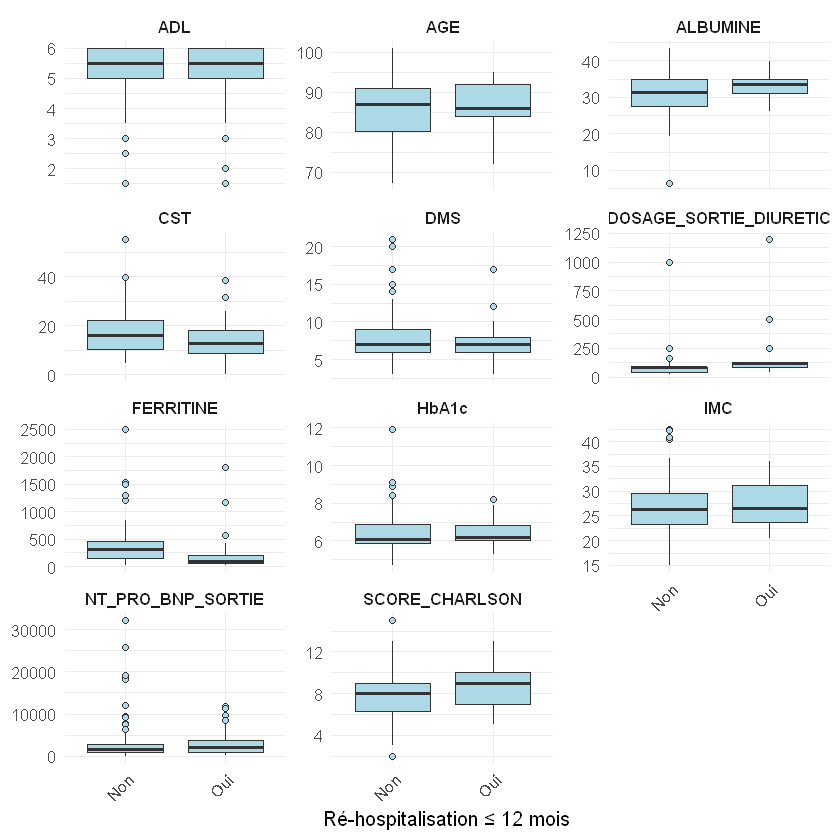

In [32]:
# 1) Choisissez votre strate : ici réhospitalisation ≤ 12 mois
strata_var <- "REHOSPITALISATION_IC_12MOIS"

# 2) Rassemblez les continues en long
df_long <- df_clean %>%
  select(all_of(c(strata_var, cont_vars))) %>%
  pivot_longer(
    cols      = all_of(cont_vars),
    names_to  = "Variable",
    values_to = "Valeur"
  )

# 3) Tracez les boxplots
ggplot(df_long, aes(x = .data[[strata_var]], y = Valeur)) +
  geom_boxplot(outlier.shape = 21, fill = "lightblue") +
  facet_wrap(~ Variable, scales = "free_y", ncol = 3) +
  labs(
    x = "Ré-hospitalisation ≤ 12 mois",
    y = NULL
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(face = "bold")
  )

Warning message:
"Removed 58 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 58 rows containing non-finite outside the scale range (`stat_bin()`)."


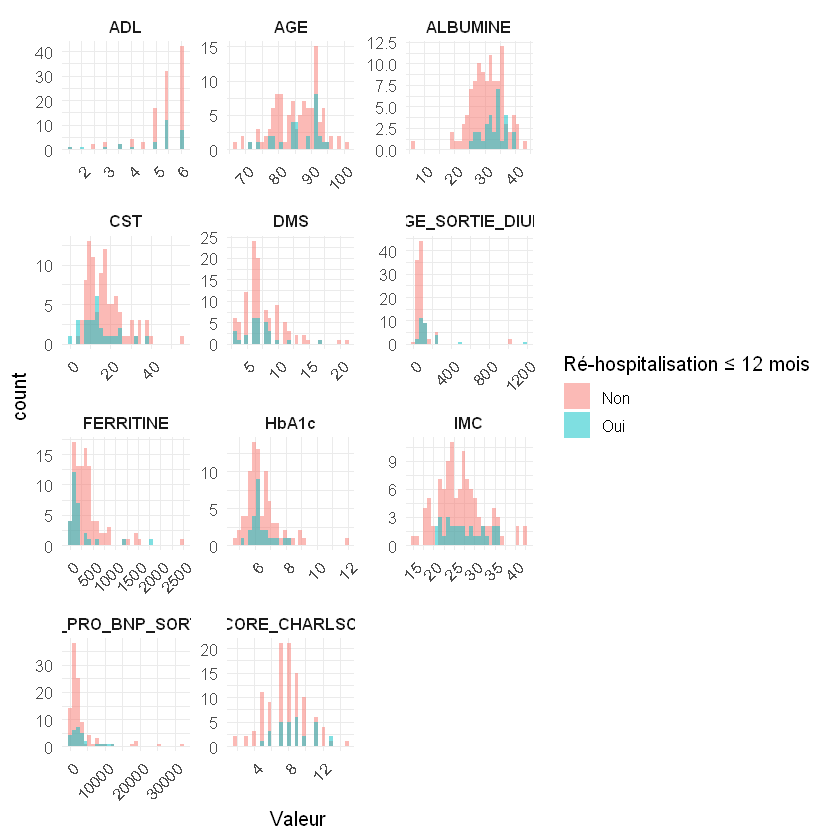

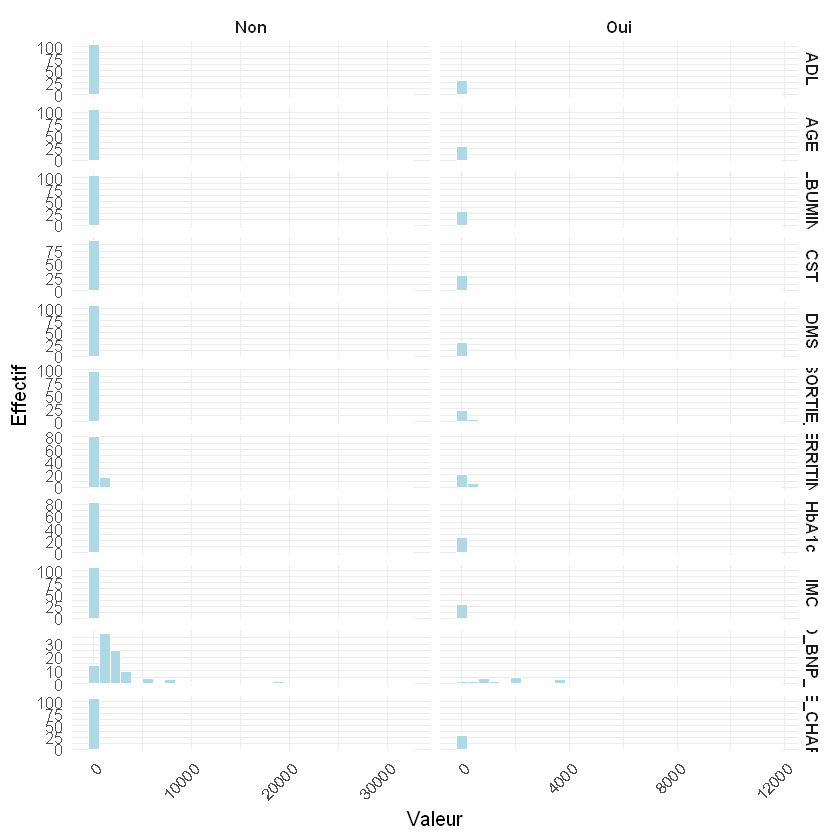

In [33]:
# 1) Choisissez votre strate : ici réhospitalisation ≤ 12 mois
strata_var <- "REHOSPITALISATION_IC_12MOIS"

# 2) Rassemblez les continues en long
df_long <- df_clean %>%
  select(all_of(c(strata_var, cont_vars))) %>%
  pivot_longer(
    cols      = all_of(cont_vars),
    names_to  = "Variable",
    values_to = "Valeur"
  )

# 3a) Histogrammes superposés (overlay) pour comparer les distributions
ggplot(df_long, aes(x = Valeur, fill = .data[[strata_var]])) +
  geom_histogram(
    position = "identity",   # superpose
    alpha    = 0.5,          # transparence
    bins     = 30            # ajustez selon vos données
  ) +
  facet_wrap(~ Variable, scales = "free", ncol = 3) +
  labs(
    x    = "Valeur",
    fill = "Ré-hospitalisation ≤ 12 mois"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(face = "bold")
  )

# 3b) Histogrammes côte-à-côte (facettés par strate)
ggplot(df_long, aes(x = Valeur)) +
  geom_histogram(bins = 30, fill = "lightblue", color = "white") +
  facet_grid(Variable ~ .data[[strata_var]], scales = "free") +
  labs(
    x    = "Valeur",
    y    = "Effectif"
  ) +
  theme_minimal(base_size = 12) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    strip.text  = element_text(face = "bold")
  )

Warning message:
"Removed 27 rows containing non-finite outside the scale range (`stat_boxplot()`)."
Warning message:
"Removed 27 rows containing non-finite outside the scale range (`stat_boxplot()`)."


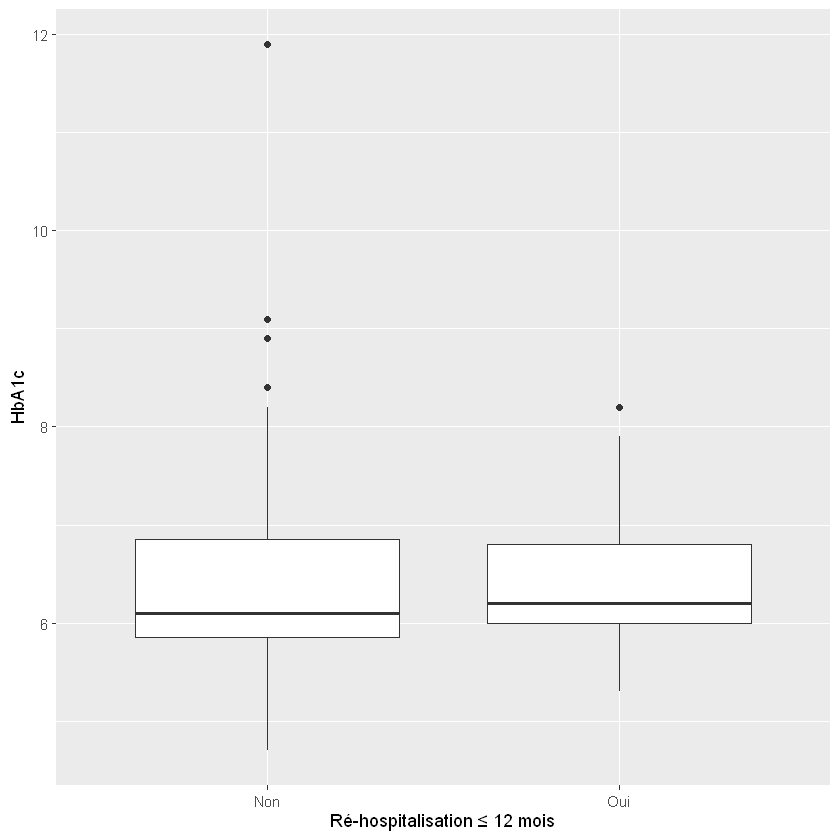

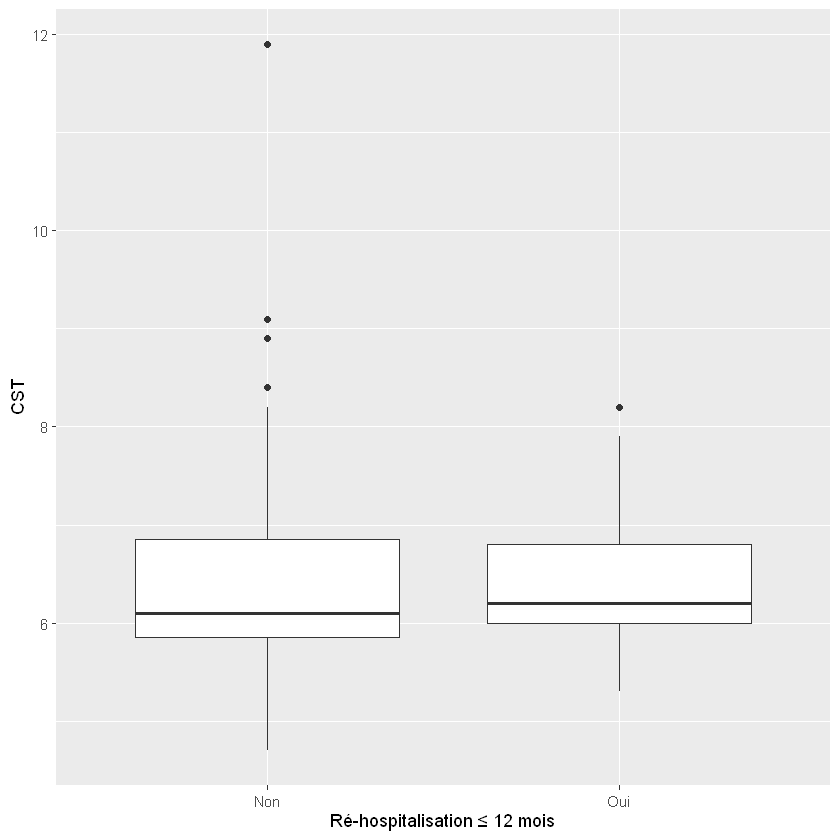

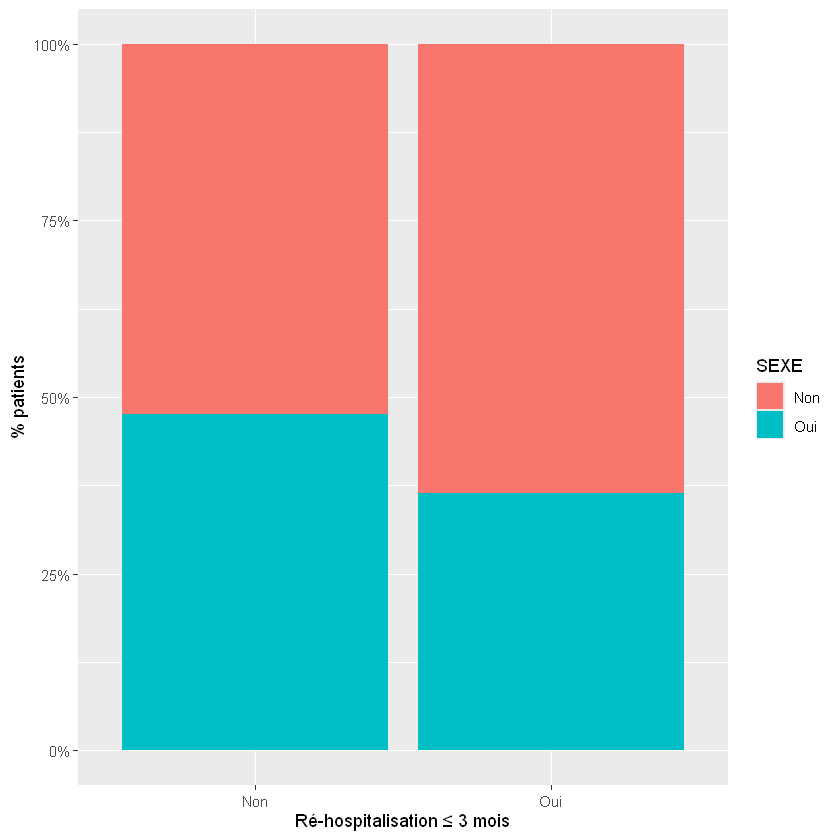

In [34]:
# Boxplot de l’AGE par réhospi 12 mois
ggplot(df_clean, aes(x = REHOSPITALISATION_IC_12MOIS, y = HbA1c)) +
  geom_boxplot() +
  labs(x = "Ré-hospitalisation ≤ 12 mois", y = "HbA1c")

ggplot(df_clean, aes(x = REHOSPITALISATION_IC_12MOIS, y = HbA1c)) +
  geom_boxplot() +
  labs(x = "Ré-hospitalisation ≤ 12 mois", y = "CST")

# Barplot de la répartition du SEXE à 3 mois
ggplot(df_clean, aes(x = REHOSPITALISATION_IC_3MOIS, fill = SEXE)) +
  geom_bar(position = "fill") +
  scale_y_continuous(labels = scales::percent_format()) +
  labs(x = "Ré-hospitalisation ≤ 3 mois", y = "% patients")


## Analyse Multivarié

In [ ]:
# Variables explicatives
vars_multivariees <- c("AGE", "SEXE", "ATCD_HTA", "SCORE_CHARLSON", 
                       "IM_AU_MOINS_MODEREE", "CARENCE_MARTIALE_VRAIE")

# Variables cibles (réhospitalisation à 1, 3, 6, 12 mois)
horizons <- c("REHOSPITALISATION_IC_1MOIS", 
              "REHOSPITALISATION_IC_3MOIS", 
              "REHOSPITALISATION_IC_6MOIS", 
              "REHOSPITALISATION_IC_12MOIS")

# Résultats stockés dans une liste
resultats_list <- list()

# Boucle d’analyse multivariée
for (cible in horizons) {
  
  cat("\n===========================")
  cat("\nAnalyse multivariée pour :", cible, "\n")
  cat("===========================\n")
  
  # Formule
  formule <- as.formula(paste(cible, "~", paste(vars_multivariees, collapse = " + ")))
  
  # Données sans NA
  df_mod <- df_clean[, c(cible, vars_multivariees)]
  df_mod <- na.omit(df_mod)
  
  # Modèle logistique
  modele <- glm(formule, data = df_mod, family = binomial(link = "logit"))
  
  # Calculs
  OR <- exp(coef(modele))
  IC <- exp(confint(modele))
  pval <- summary(modele)$coefficients[, 4]
  
  # Tableau de résultats
  tableau <- data.frame(
    Variable = names(OR),
    OR = round(OR, 2),
    CI_low = round(IC[, 1], 2),
    CI_high = round(IC[, 2], 2),
    p_value = round(pval, 4)
  )
  
  print(tableau)
  
  # Stockage
  resultats_list[[cible]] <- tableau
}


In [ ]:
resultats_list["REHOSPITALISATION_IC_1MOIS"]

In [ ]:
wb <- createWorkbook()

# Pour chaque horizon (clé dans la liste)
for (nom in names(resultats_list)) {
  addWorksheet(wb, sheetName = nom)  # Ajouter une feuille nommée
  writeData(wb, sheet = nom, x = resultats_list[[nom]])
}

# Enregistrer le fichier
saveWorkbook(wb, file = "../output/Table_multivarié_v1.xlsx", overwrite = TRUE)

In [ ]:
str(df_clean$REHOSPITALISATION_IC_1MOIS)
str(df_clean$REHOSPITALISATION_IC_3MOIS)
str(df_clean$REHOSPITALISATION_IC_6MOIS)
str(df_clean$REHOSPITALISATION_IC_12MOIS)

In [ ]:
summary(df_clean$REHOSPITALISATION_IC_1MOIS)